In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
pd.set_option("display.max_columns",100)

import warnings

warnings.simplefilter("ignore", UserWarning)
warnings.simplefilter("ignore", FutureWarning)
warnings.simplefilter("ignore", DeprecationWarning)


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import seaborn as sns
!pip install wordcloud
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator
import nltk
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from textblob import Word,TextBlob
from nltk.stem.snowball import SnowballStemmer
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from PIL import Image
import scipy as cp

In [3]:
dataset = "Electronics_5.json"

if os.path.isfile(dataset):
    df = pd.read_json("Electronics_5.json", lines=True)
else:
    url = r"http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/reviews_Electronics_5.json.gz"
    df = pd.read_json(url, compression='gzip', lines=True)

display(df.head(10))


,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,AO94DHGC771SJ,0528881469,amazdnu,"[0, 0]",We got this GPS for my husband who is an (OTR)...,5,Gotta have GPS!,1370131200,"06 2, 2013"
1,AMO214LNFCEI4,0528881469,Amazon Customer,"[12, 15]","I'm a professional OTR truck driver, and I bou...",1,Very Disappointed,1290643200,"11 25, 2010"
2,A3N7T0DY83Y4IG,0528881469,C. A. Freeman,"[43, 45]","Well, what can I say. I've had this unit in m...",3,1st impression,1283990400,"09 9, 2010"
3,A1H8PY3QHMQQA0,0528881469,"Dave M. Shaw ""mack dave""","[9, 10]","Not going to write a long review, even thought...",2,"Great grafics, POOR GPS",1290556800,"11 24, 2010"
4,A24EV6RXELQZ63,0528881469,Wayne Smith,"[0, 0]",I've had mine for a year and here's what we go...,1,"Major issues, only excuses for support",1317254400,"09 29, 2011"
5,A2JXAZZI9PHK9Z,0594451647,"Billy G. Noland ""Bill Noland""","[3, 3]",I am using this with a Nook HD+. It works as d...,5,HDMI Nook adapter cable,1388707200,"01 3, 2014"
6,A2P5U7BDKKT7FW,0594451647,Christian,"[0, 0]",The cable is very wobbly and sometimes disconn...,2,Cheap proprietary scam,1398556800,"04 27, 2014"
7,AAZ084UMH8VZ2,0594451647,"D. L. Brown ""A Knower Of Good Things""","[0, 0]",This adaptor is real easy to setup and use rig...,5,A Perfdect Nook HD+ hook up,1399161600,"05 4, 2014"
8,AEZ3CR6BKIROJ,0594451647,Mark Dietter,"[0, 0]",This adapter easily connects my Nook HD 7&#34;...,4,A nice easy to use accessory.,1405036800,"07 11, 2014"
9,A3BY5KCNQZXV5U,0594451647,Matenai,"[3, 3]",This product really works great but I found th...,5,This works great but read the details...,1390176000,"01 20, 2014"


In [4]:
df.to_csv("amazon.csv")

In [5]:
df=df.sample(10000)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 720972 to 257788
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   reviewerID      10000 non-null  object
 1   asin            10000 non-null  object
 2   reviewerName    9847 non-null   object
 3   helpful         10000 non-null  object
 4   reviewText      10000 non-null  object
 5   overall         10000 non-null  int64 
 6   summary         10000 non-null  object
 7   unixReviewTime  10000 non-null  int64 
 8   reviewTime      10000 non-null  object
dtypes: int64(2), object(7)
memory usage: 781.2+ KB


In [7]:
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
720972,A3M0ZTXDEF4Z0X,B0036WS4D4,Jerrbear,"[0, 0]","This sony blu ray player is very good, it deli...",5,"great blu-ray player, streaming is so-so",1290988800,"11 29, 2010"
930910,A3R9H6OKZHHRJD,B004CLYEH8,LH422,"[0, 1]","How does one review a cord? For me, there are...",5,Does its job,1353974400,"11 27, 2012"
284947,ANVDWXB09B28C,B000OMKR8E,Amazon Customer,"[0, 0]",I had these headphones for about a year now an...,4,Its Pretty Good,1261785600,"12 26, 2009"
921615,A4OLR73CS4AKI,B004AFFZNI,JR,"[0, 0]",It worked great. Too bad the GoPro camera plug...,4,Works,1394928000,"03 16, 2014"
1199079,APBICPEUMXUVO,B00603RS9W,"LargeHeadedMagoo ""LargeHeadedMagoo""","[6, 6]",I bought the AGFA 58mm Heavy Duty Rubber Lens ...,4,Extremely high quality but may block autofocus...,1336780800,"05 12, 2012"


In [8]:
df.tail()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
1074227,AAUD6QJQ3FHT4,B00543FWDI,Creben,"[0, 0]",This has worked great! It slides off of my cam...,4,Good product,1396310400,"04 1, 2014"
570685,A2V9BOZ9W7UTE7,B00280BDM4,Patricia M. Dashiell,"[0, 0]",LOVE IT! I have upgraded my phone now and nee...,5,Happy Owner and Gift Giver of These,1386028800,"12 3, 2013"
1044803,A2HLNOR1YQN7K4,B004XC6GJ0,NaN,"[0, 0]",solid connectivity and good throughput. time w...,5,works with DFW TWC,1401840000,"06 4, 2014"
222685,A1AA07LUK34AQ8,B000H866BM,"mruseless ""mruseless""","[9, 10]","Maps are good, fairly accurate. Directions wer...",4,"Overall, a great GPS",1184716800,"07 18, 2007"
257788,A1KA3UX00SDRRD,B000LRMS66,"D. Davis ""java007""","[0, 0]",After reading reviews here and on POI Factory ...,5,Steady and stable platform,1216944000,"07 25, 2008"


In [9]:
df.sample(5)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
547287,A3I42CDG116KKQ,B001VEIYAC,"J. F. Vogel ""Road Runner""","[0, 0]",This Magellan was my second purchase for Magel...,5,Magellan second time around,1264982400,"02 1, 2010"
349021,AP9A7QBHUAMGB,B000Y7T5UU,Satbir Singh,"[0, 0]",the product looks great in picture but it does...,1,not working,1354579200,"12 4, 2012"
937274,A3NQSMTG612AF,B004EBUXHQ,TheTruthHurts,"[5, 5]","I won't try to reiterate T.R.'s extensive, acc...",5,Unbelievably fast...simply unbeatable for gami...,1301529600,"03 31, 2011"
791955,A3OBZ4F27KV8NO,B003LR7ME6,G. Meredith,"[0, 0]",Very stylish cover and a perfect fit. Everyone...,5,Very Stylish,1386201600,"12 5, 2013"
463906,A2MO8QZTNYYB98,B001FOR1G6,Sheri Fogarty,"[1, 1]","This is my first time using a projector, and t...",5,Fantastic Projector,1239148800,"04 8, 2009"


In [ ]:
##FEATURE ENGINEERING
#Creatıng Datetime column and cleaning reviewText

In [10]:
from datetime import datetime

In [11]:
condition=lambda row:datetime.fromtimestamp(row).strftime("%m-%d-%Y")
df["unixReviewTime"]=df["unixReviewTime"].apply(condition)

In [12]:
df.drop(["reviewTime"],axis=1,inplace=True)

In [13]:
df

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime
720972,A3M0ZTXDEF4Z0X,B0036WS4D4,Jerrbear,"[0, 0]","This sony blu ray player is very good, it deli...",5,"great blu-ray player, streaming is so-so",11-29-2010
930910,A3R9H6OKZHHRJD,B004CLYEH8,LH422,"[0, 1]","How does one review a cord? For me, there are...",5,Does its job,11-27-2012
284947,ANVDWXB09B28C,B000OMKR8E,Amazon Customer,"[0, 0]",I had these headphones for about a year now an...,4,Its Pretty Good,12-26-2009
921615,A4OLR73CS4AKI,B004AFFZNI,JR,"[0, 0]",It worked great. Too bad the GoPro camera plug...,4,Works,03-16-2014
1199079,APBICPEUMXUVO,B00603RS9W,"LargeHeadedMagoo ""LargeHeadedMagoo""","[6, 6]",I bought the AGFA 58mm Heavy Duty Rubber Lens ...,4,Extremely high quality but may block autofocus...,05-12-2012
...,...,...,...,...,...,...,...,...
1074227,AAUD6QJQ3FHT4,B00543FWDI,Creben,"[0, 0]",This has worked great! It slides off of my cam...,4,Good product,04-01-2014
570685,A2V9BOZ9W7UTE7,B00280BDM4,Patricia M. Dashiell,"[0, 0]",LOVE IT! I have upgraded my phone now and nee...,5,Happy Owner and Gift Giver of These,12-03-2013
1044803,A2HLNOR1YQN7K4,B004XC6GJ0,NaN,"[0, 0]",solid connectivity and good throughput. time w...,5,works with DFW TWC,06-04-2014
222685,A1AA07LUK34AQ8,B000H866BM,"mruseless ""mruseless""","[9, 10]","Maps are good, fairly accurate. Directions wer...",4,"Overall, a great GPS",07-18-2007


In [ ]:
##Clearing HTML tags from text column

In [14]:
pattern=r"\&\#[0-9]+\;"
df["preprocessed"]=df["reviewText"].str.replace(pat=pattern,repl="",regex=True)
print(df["preprocessed"].iloc[11])

This card charger is a convenient size and works well.  Only used it once with my iphone, but it seemed to work quickly and work well.  Convenient that can charge one apple and one non-apple device on the same device.  So far so good!


In [ ]:
##Dropping useless columns

In [15]:
df.drop(["reviewerID","asin","reviewerName","summary","unixReviewTime","helpful"],axis=1,inplace=True)

In [16]:
df

,reviewText,overall,preprocessed
720972,"This sony blu ray player is very good, it deli...",5,"This sony blu ray player is very good, it deli..."
930910,"How does one review a cord? For me, there are...",5,"How does one review a cord? For me, there are..."
284947,I had these headphones for about a year now an...,4,I had these headphones for about a year now an...
921615,It worked great. Too bad the GoPro camera plug...,4,It worked great. Too bad the GoPro camera plug...
1199079,I bought the AGFA 58mm Heavy Duty Rubber Lens ...,4,I bought the AGFA 58mm Heavy Duty Rubber Lens ...
...,...,...,...
1074227,This has worked great! It slides off of my cam...,4,This has worked great! It slides off of my cam...
570685,LOVE IT! I have upgraded my phone now and nee...,5,LOVE IT! I have upgraded my phone now and nee...
1044803,solid connectivity and good throughput. time w...,5,solid connectivity and good throughput. time w...
222685,"Maps are good, fairly accurate. Directions wer...",4,"Maps are good, fairly accurate. Directions wer..."


In [ ]:
#VİSUALISATION

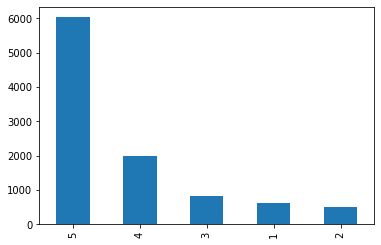

In [17]:
df["overall"].value_counts().plot(kind="bar");

In [ ]:
##NLP TEXT PREPROCESSING

In [ ]:
#CLEARING

In [18]:
df.head()

,reviewText,overall,preprocessed
720972,"This sony blu ray player is very good, it deli...",5,"This sony blu ray player is very good, it deli..."
930910,"How does one review a cord? For me, there are...",5,"How does one review a cord? For me, there are..."
284947,I had these headphones for about a year now an...,4,I had these headphones for about a year now an...
921615,It worked great. Too bad the GoPro camera plug...,4,It worked great. Too bad the GoPro camera plug...
1199079,I bought the AGFA 58mm Heavy Duty Rubber Lens ...,4,I bought the AGFA 58mm Heavy Duty Rubber Lens ...


In [19]:
df["reviewText"]=df["reviewText"].str.lower()
df["reviewText"]=df["reviewText"].str.replace("[^\w\s]","")
df["reviewText"]=df["reviewText"].str.replace("\d+","")
df["reviewText"]=df["reviewText"].str.replace("\r","").replace("\n","")

In [22]:
df["reviewText"][720972]

'this sony blu ray player is very good it delivers as one expects for a bluray player i have it hooked up to a sony sound bar theater system  i think and it works seamlessly together as it should the sound bar remote and the blu ray remote are identical except that the sound bar remote is longer with a few added features the player is hooked up to a pamasonic plasma and the image quality is very good the player is d ready but i have not had any content to test it outi have tried the internet streaming options and they are reasonable for a smaller tv if you have high expectations this will be a disappointment on a large plasma for example which has internet access the quality of picture is evidently worse via the player rather than the tv directly in addition the access to netflix is limited to the movies one has in ones queue on the tv netflix access i can access the online queue but also a limited sample of other movies based on my previous choices this is handy if you are entertaning

In [ ]:
##Classification our overall column by sentiment

In [23]:
df.loc[df["overall"]==3,"sentiment"]="neutral"
df.loc[df["overall"]<3,"sentiment"]="negative"
df.loc[df["overall"]>3,"sentiment"]="positive"

In [24]:
df

,reviewText,overall,preprocessed,sentiment
720972,this sony blu ray player is very good it deliv...,5,"This sony blu ray player is very good, it deli...",positive
930910,how does one review a cord for me there are t...,5,"How does one review a cord? For me, there are...",positive
284947,i had these headphones for about a year now an...,4,I had these headphones for about a year now an...,positive
921615,it worked great too bad the gopro camera plug ...,4,It worked great. Too bad the GoPro camera plug...,positive
1199079,i bought the agfa mm heavy duty rubber lens ho...,4,I bought the AGFA 58mm Heavy Duty Rubber Lens ...,positive
...,...,...,...,...
1074227,this has worked great it slides off of my came...,4,This has worked great! It slides off of my cam...,positive
570685,love it i have upgraded my phone now and need...,5,LOVE IT! I have upgraded my phone now and nee...,positive
1044803,solid connectivity and good throughput time wa...,5,solid connectivity and good throughput. time w...,positive
222685,maps are good fairly accurate directions were ...,4,"Maps are good, fairly accurate. Directions wer...",positive


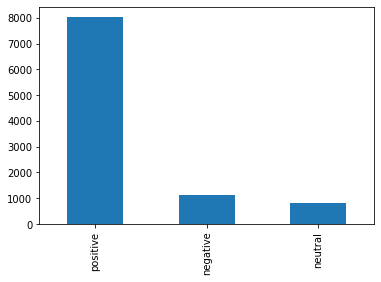

In [25]:
df["sentiment"].value_counts().plot(kind="bar");

In [26]:
df["reviewText"].isnull().sum()

0

In [27]:
df.to_csv("nlp1.csv")

In [28]:
df=pd.read_csv("nlp1.csv")

In [ ]:
##TOKENIZATION

In [29]:
from nltk.tokenize import TreebankWordTokenizer
tokenizer=TreebankWordTokenizer()

In [30]:
df["tokenized"]=[tokenizer.tokenize(str(i)) for i in df["reviewText"].values]

In [31]:
df.to_csv("nlp2.csv")

In [32]:
df=pd.read_csv("nlp2.csv")
df

,Unnamed: 0,Unnamed: 0.1,reviewText,overall,preprocessed,sentiment,tokenized
0,0,720972,this sony blu ray player is very good it deliv...,5,"This sony blu ray player is very good, it deli...",positive,"['this', 'sony', 'blu', 'ray', 'player', 'is',..."
1,1,930910,how does one review a cord for me there are t...,5,"How does one review a cord? For me, there are...",positive,"['how', 'does', 'one', 'review', 'a', 'cord', ..."
2,2,284947,i had these headphones for about a year now an...,4,I had these headphones for about a year now an...,positive,"['i', 'had', 'these', 'headphones', 'for', 'ab..."
3,3,921615,it worked great too bad the gopro camera plug ...,4,It worked great. Too bad the GoPro camera plug...,positive,"['it', 'worked', 'great', 'too', 'bad', 'the',..."
4,4,1199079,i bought the agfa mm heavy duty rubber lens ho...,4,I bought the AGFA 58mm Heavy Duty Rubber Lens ...,positive,"['i', 'bought', 'the', 'agfa', 'mm', 'heavy', ..."
...,...,...,...,...,...,...,...
9995,9995,1074227,this has worked great it slides off of my came...,4,This has worked great! It slides off of my cam...,positive,"['this', 'has', 'worked', 'great', 'it', 'slid..."
9996,9996,570685,love it i have upgraded my phone now and need...,5,LOVE IT! I have upgraded my phone now and nee...,positive,"['love', 'it', 'i', 'have', 'upgraded', 'my', ..."
9997,9997,1044803,solid connectivity and good throughput time wa...,5,solid connectivity and good throughput. time w...,positive,"['solid', 'connectivity', 'and', 'good', 'thro..."
9998,9998,222685,maps are good fairly accurate directions were ...,4,"Maps are good, fairly accurate. Directions wer...",positive,"['maps', 'are', 'good', 'fairly', 'accurate', ..."


In [33]:
del df["Unnamed: 0"]

In [34]:
del df["Unnamed: 0.1"]

In [35]:
df

,reviewText,overall,preprocessed,sentiment,tokenized
0,this sony blu ray player is very good it deliv...,5,"This sony blu ray player is very good, it deli...",positive,"['this', 'sony', 'blu', 'ray', 'player', 'is',..."
1,how does one review a cord for me there are t...,5,"How does one review a cord? For me, there are...",positive,"['how', 'does', 'one', 'review', 'a', 'cord', ..."
2,i had these headphones for about a year now an...,4,I had these headphones for about a year now an...,positive,"['i', 'had', 'these', 'headphones', 'for', 'ab..."
3,it worked great too bad the gopro camera plug ...,4,It worked great. Too bad the GoPro camera plug...,positive,"['it', 'worked', 'great', 'too', 'bad', 'the',..."
4,i bought the agfa mm heavy duty rubber lens ho...,4,I bought the AGFA 58mm Heavy Duty Rubber Lens ...,positive,"['i', 'bought', 'the', 'agfa', 'mm', 'heavy', ..."
...,...,...,...,...,...
9995,this has worked great it slides off of my came...,4,This has worked great! It slides off of my cam...,positive,"['this', 'has', 'worked', 'great', 'it', 'slid..."
9996,love it i have upgraded my phone now and need...,5,LOVE IT! I have upgraded my phone now and nee...,positive,"['love', 'it', 'i', 'have', 'upgraded', 'my', ..."
9997,solid connectivity and good throughput time wa...,5,solid connectivity and good throughput. time w...,positive,"['solid', 'connectivity', 'and', 'good', 'thro..."
9998,maps are good fairly accurate directions were ...,4,"Maps are good, fairly accurate. Directions wer...",positive,"['maps', 'are', 'good', 'fairly', 'accurate', ..."


In [36]:
df=df[df["reviewText"].notna()]

In [ ]:
##POLARITY AND SUBJECTIVITY


In [37]:
from textblob import TextBlob


In [38]:
df[["polarity","subjectivity"]]=df["reviewText"].apply(lambda Text:pd.Series(TextBlob(Text).sentiment))

In [39]:
df

,reviewText,overall,preprocessed,sentiment,tokenized,polarity,subjectivity
0,this sony blu ray player is very good it deliv...,5,"This sony blu ray player is very good, it deli...",positive,"['this', 'sony', 'blu', 'ray', 'player', 'is',...",0.115642,0.402433
1,how does one review a cord for me there are t...,5,"How does one review a cord? For me, there are...",positive,"['how', 'does', 'one', 'review', 'a', 'cord', ...",0.084921,0.406349
2,i had these headphones for about a year now an...,4,I had these headphones for about a year now an...,positive,"['i', 'had', 'these', 'headphones', 'for', 'ab...",-0.275000,0.675000
3,it worked great too bad the gopro camera plug ...,4,It worked great. Too bad the GoPro camera plug...,positive,"['it', 'worked', 'great', 'too', 'bad', 'the',...",-0.090000,0.623333
4,i bought the agfa mm heavy duty rubber lens ho...,4,I bought the AGFA 58mm Heavy Duty Rubber Lens ...,positive,"['i', 'bought', 'the', 'agfa', 'mm', 'heavy', ...",0.213590,0.671026
...,...,...,...,...,...,...,...
9995,this has worked great it slides off of my came...,4,This has worked great! It slides off of my cam...,positive,"['this', 'has', 'worked', 'great', 'it', 'slid...",0.533333,0.566667
9996,love it i have upgraded my phone now and need...,5,LOVE IT! I have upgraded my phone now and nee...,positive,"['love', 'it', 'i', 'have', 'upgraded', 'my', ...",0.328939,0.589242
9997,solid connectivity and good throughput time wa...,5,solid connectivity and good throughput. time w...,positive,"['solid', 'connectivity', 'and', 'good', 'thro...",0.350000,0.350000
9998,maps are good fairly accurate directions were ...,4,"Maps are good, fairly accurate. Directions wer...",positive,"['maps', 'are', 'good', 'fairly', 'accurate', ...",0.253968,0.628783


In [40]:
df.loc[df["subjectivity"]==0.5,"subjectivitysentiment"]="neutral"
df.loc[df["subjectivity"]>0.5,"subjectivitysentiment"]="positive"
df.loc[df["subjectivity"]<0.5,"subjectivitysentiment"]="negative"


In [41]:
df

,reviewText,overall,preprocessed,sentiment,tokenized,polarity,subjectivity,subjectivitysentiment
0,this sony blu ray player is very good it deliv...,5,"This sony blu ray player is very good, it deli...",positive,"['this', 'sony', 'blu', 'ray', 'player', 'is',...",0.115642,0.402433,negative
1,how does one review a cord for me there are t...,5,"How does one review a cord? For me, there are...",positive,"['how', 'does', 'one', 'review', 'a', 'cord', ...",0.084921,0.406349,negative
2,i had these headphones for about a year now an...,4,I had these headphones for about a year now an...,positive,"['i', 'had', 'these', 'headphones', 'for', 'ab...",-0.275000,0.675000,positive
3,it worked great too bad the gopro camera plug ...,4,It worked great. Too bad the GoPro camera plug...,positive,"['it', 'worked', 'great', 'too', 'bad', 'the',...",-0.090000,0.623333,positive
4,i bought the agfa mm heavy duty rubber lens ho...,4,I bought the AGFA 58mm Heavy Duty Rubber Lens ...,positive,"['i', 'bought', 'the', 'agfa', 'mm', 'heavy', ...",0.213590,0.671026,positive
...,...,...,...,...,...,...,...,...
9995,this has worked great it slides off of my came...,4,This has worked great! It slides off of my cam...,positive,"['this', 'has', 'worked', 'great', 'it', 'slid...",0.533333,0.566667,positive
9996,love it i have upgraded my phone now and need...,5,LOVE IT! I have upgraded my phone now and nee...,positive,"['love', 'it', 'i', 'have', 'upgraded', 'my', ...",0.328939,0.589242,positive
9997,solid connectivity and good throughput time wa...,5,solid connectivity and good throughput. time w...,positive,"['solid', 'connectivity', 'and', 'good', 'thro...",0.350000,0.350000,negative
9998,maps are good fairly accurate directions were ...,4,"Maps are good, fairly accurate. Directions wer...",positive,"['maps', 'are', 'good', 'fairly', 'accurate', ...",0.253968,0.628783,positive


In [42]:
df.to_csv("nlp3.csv")

In [43]:
df=pd.read_csv("nlp3.csv")

In [44]:
df

,Unnamed: 0,reviewText,overall,preprocessed,sentiment,tokenized,polarity,subjectivity,subjectivitysentiment
0,0,this sony blu ray player is very good it deliv...,5,"This sony blu ray player is very good, it deli...",positive,"['this', 'sony', 'blu', 'ray', 'player', 'is',...",0.115642,0.402433,negative
1,1,how does one review a cord for me there are t...,5,"How does one review a cord? For me, there are...",positive,"['how', 'does', 'one', 'review', 'a', 'cord', ...",0.084921,0.406349,negative
2,2,i had these headphones for about a year now an...,4,I had these headphones for about a year now an...,positive,"['i', 'had', 'these', 'headphones', 'for', 'ab...",-0.275000,0.675000,positive
3,3,it worked great too bad the gopro camera plug ...,4,It worked great. Too bad the GoPro camera plug...,positive,"['it', 'worked', 'great', 'too', 'bad', 'the',...",-0.090000,0.623333,positive
4,4,i bought the agfa mm heavy duty rubber lens ho...,4,I bought the AGFA 58mm Heavy Duty Rubber Lens ...,positive,"['i', 'bought', 'the', 'agfa', 'mm', 'heavy', ...",0.213590,0.671026,positive
...,...,...,...,...,...,...,...,...,...
9988,9995,this has worked great it slides off of my came...,4,This has worked great! It slides off of my cam...,positive,"['this', 'has', 'worked', 'great', 'it', 'slid...",0.533333,0.566667,positive
9989,9996,love it i have upgraded my phone now and need...,5,LOVE IT! I have upgraded my phone now and nee...,positive,"['love', 'it', 'i', 'have', 'upgraded', 'my', ...",0.328939,0.589242,positive
9990,9997,solid connectivity and good throughput time wa...,5,solid connectivity and good throughput. time w...,positive,"['solid', 'connectivity', 'and', 'good', 'thro...",0.350000,0.350000,negative
9991,9998,maps are good fairly accurate directions were ...,4,"Maps are good, fairly accurate. Directions wer...",positive,"['maps', 'are', 'good', 'fairly', 'accurate', ...",0.253968,0.628783,positive


In [45]:
df=df.drop(["Unnamed: 0"],axis=1)

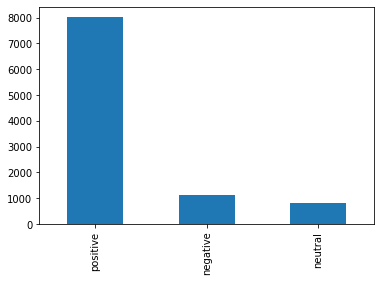

In [46]:
df["sentiment"].value_counts().plot.bar();

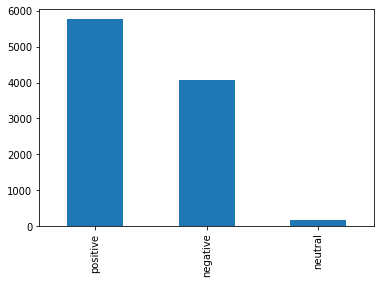

In [47]:
df["subjectivitysentiment"].value_counts().plot.bar();

In [ ]:
##Probably differences between sentiment and subjectivitysentiment originate from different consumer comments and scores

In [48]:
from wordcloud import WordCloud

In [60]:
!pip install stylecloud

     |████████████████████████████████| 262 kB 5.1 MB/s 
     |████████████████████████████████| 161 kB 26.1 MB/s 
     |████████████████████████████████| 87 kB 4.6 MB/s 
     |████████████████████████████████| 87 kB 6.0 MB/s 
  Created wheel for stylecloud: filename=stylecloud-0.5.2-py3-none-any.whl size=259508 sha256=59f6ace34ef3a8b547de804de4df762eb681a945d824b4ab2628afba2176591a
  Stored in directory: /root/.cache/pip/wheels/77/42/7a/f52b5f84c04196fd4c2a3dceeb1bbeaee1c93a4fe271b5eb41
  Created wheel for fire: filename=fire-0.4.0-py2.py3-none-any.whl size=115943 sha256=f5d0f997c161f0d61b1d30ac8e45b2cbb0ed38b760d50169caf6c9366dd766e0
  Stored in directory: /root/.cache/pip/wheels/8a/67/fb/2e8a12fa16661b9d5af1f654bd199366799740a85c64981226
  Created wheel for tinycss: filename=tinycss-0.4-py3-none-any.whl size=43955 sha256=d9043fcb6ec03b7f74fde9b383b25f5d0678b1f146c24a225665b180f6be1167
  Stored in directory: /root/.cache/pip/wheels/6c/66/e8/e53d7a476011891fa51a5ee83a2d1852b19b258f975

In [66]:
from google.colab import files
files.upload()

Saving star.png to star.png


{'star.png': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x07\xd0\x00\x00\x07{\x08\x06\x00\x00\x00\xe9\xe3%T\x00\x00 \x00IDATx\x9c\xec\xdd}\x88]\xf7}\xe7\xf1\xdf\xb9\xf7\xce\xb9\xe3\x9143\x92e\xf9A\x0f\x1e\xc9J\x1aB(\xc6\x84n\x1a\x8a\t!\x04c\xb2!\x94\x10J\tY\xc8\x06\x93\x86>\xb8I\xd5\xa4\xb6\x1boZJ\x08\xa1\x84\x10B1\xa1,&\xcd\x1acl\xd7\x18\x93\xb5%\xb7\x89m)\xa9\xe3D&M[\xdcP\x9a\xdd%Y\xdc\x96u,\x8d\xe6>\xcd=g\xffpd\xcb\xb6$\xcf\x8c\xee\xbd\xdfs\xefy\xbd\xfe\x92\x14\xe9\x9ew\xe6\xbf\xdf\xf9x~\x93\x12\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x0

In [49]:
def wc(data,bgcolor):
    from PIL import Image
    mask=np.array(Image.open("star.png"))
    wc=WordCloud(background_color=bgcolor,width=800,height=400,max_words=200,mask=mask).generate(" ".join(data))#satırlar birleştirilip metin haline etirildi
    plt.figure(figsize=(23,23))
    plt.imshow(wc)
    plt.axis("off")
    plt.show()
    

In [50]:
pos_data_sent=df[df["sentiment"]=="positive"]["reviewText"]
neg_data_sent=df[df["sentiment"]=="negative"]["reviewText"]
neut_data_sent=df[df["sentiment"]=="neutral"]["reviewText"]

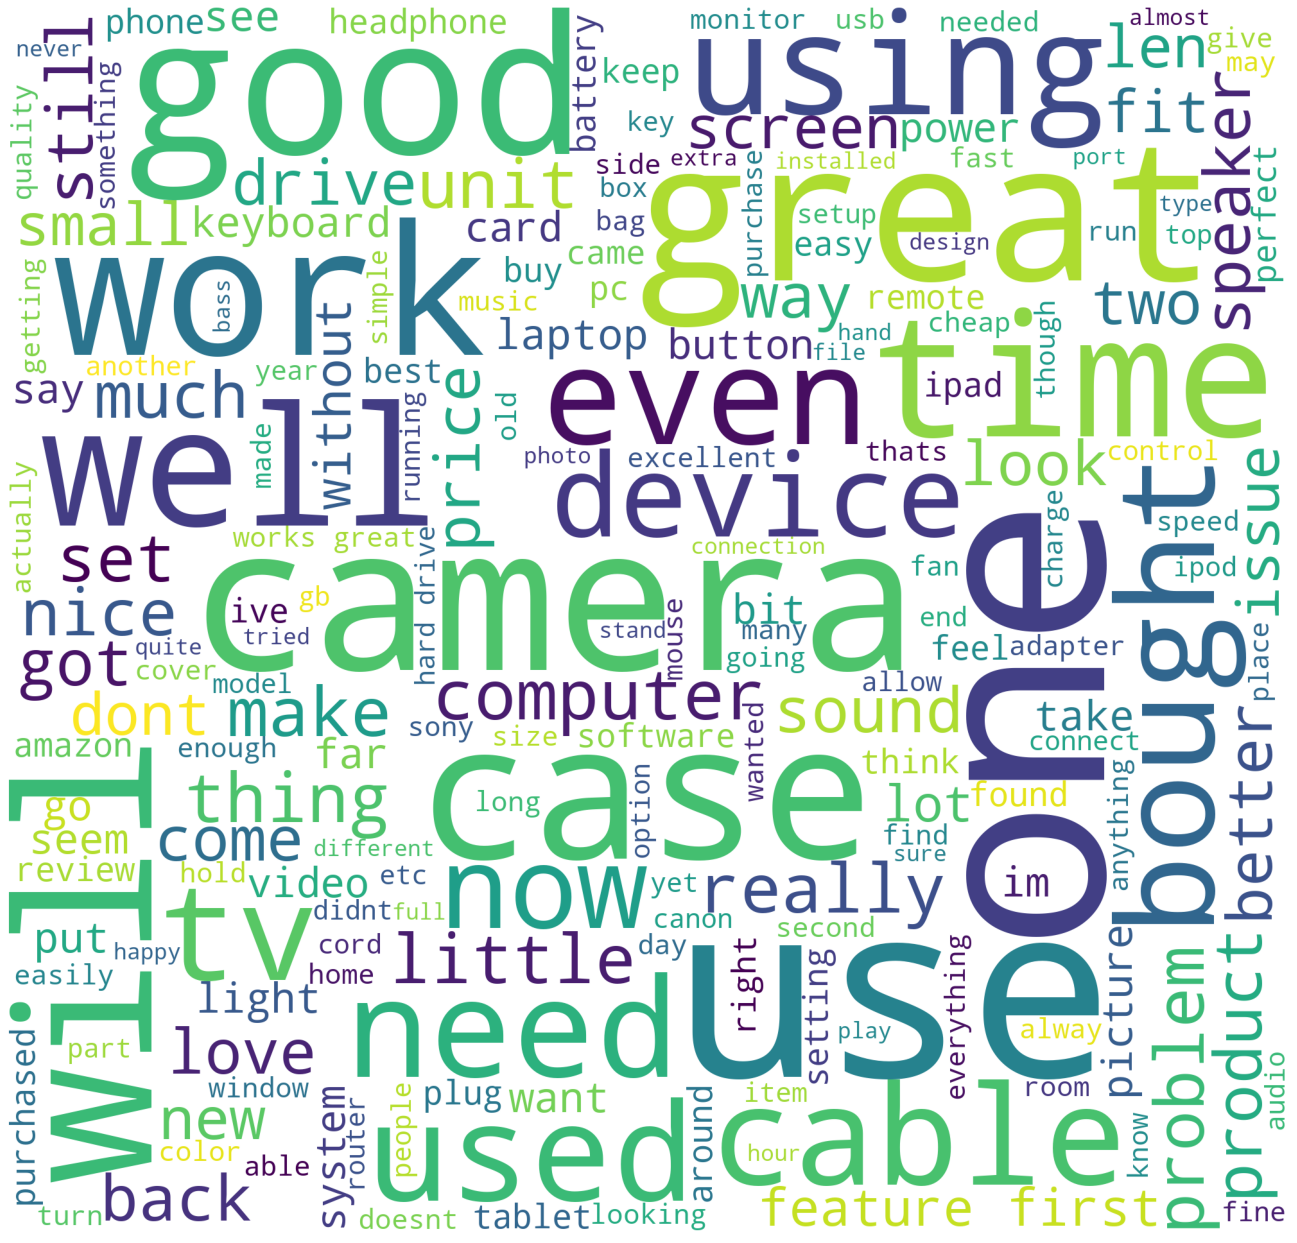

In [51]:
wc(pos_data_sent,"white")

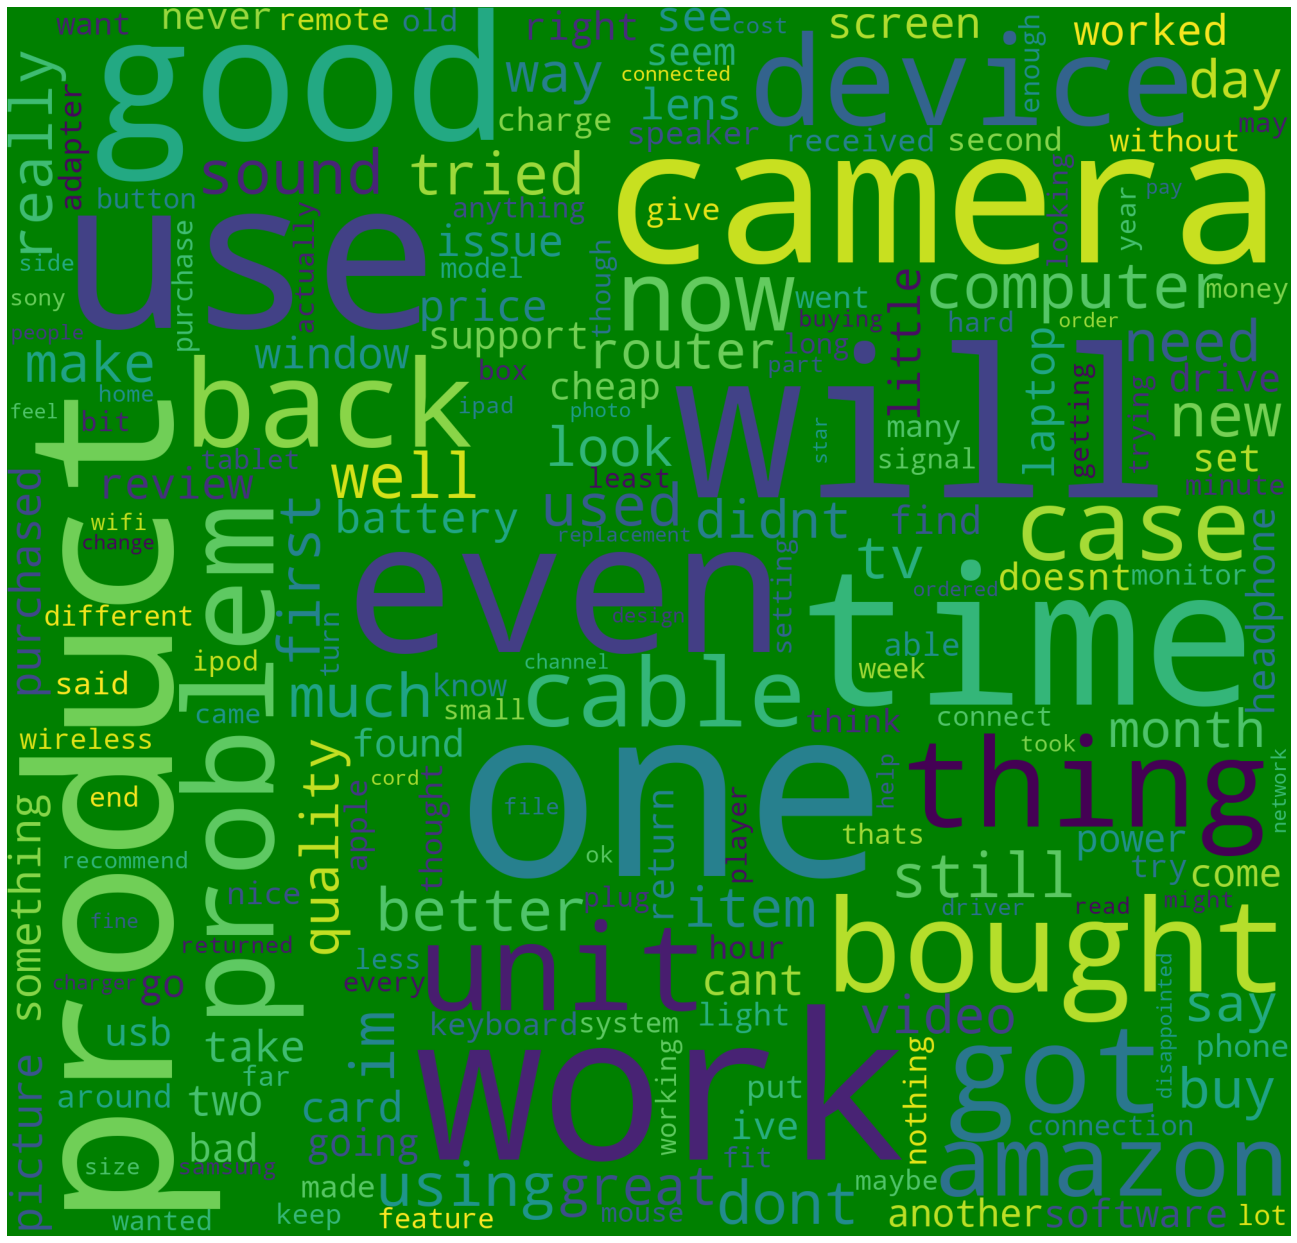

In [52]:
wc(neg_data_sent,"green")

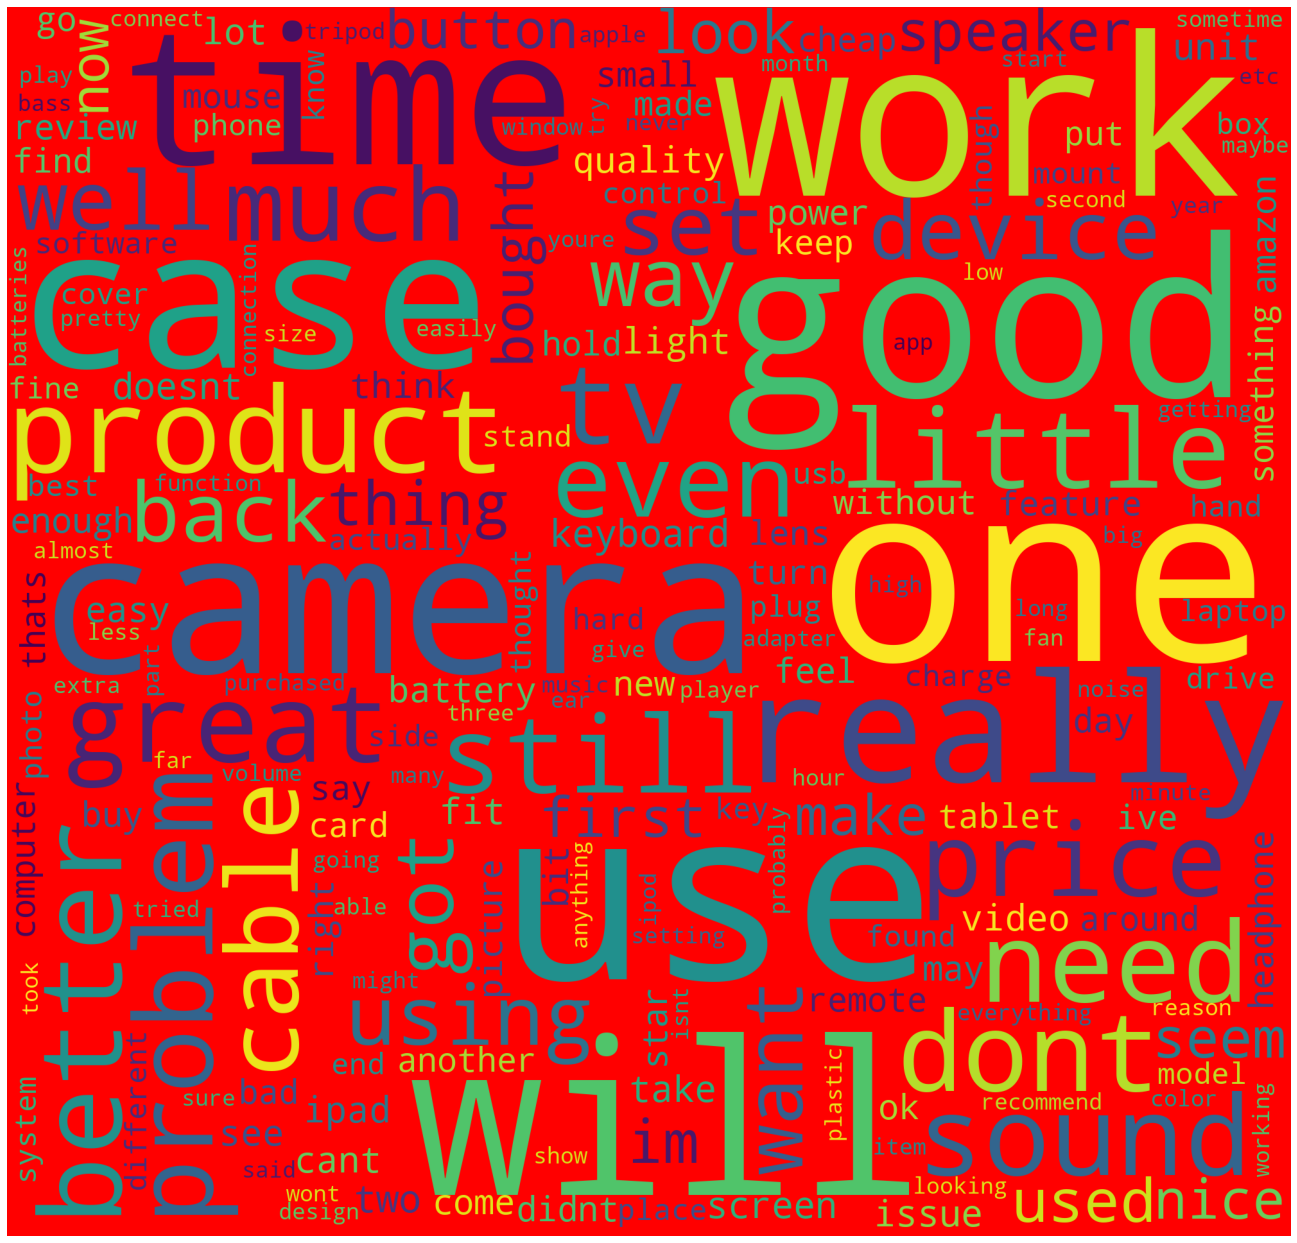

In [53]:
wc(neut_data_sent,"red")

In [ ]:
##CLASSIFICATION

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [55]:
x,y=df["reviewText"],df["sentiment"]

In [56]:
x.shape,y.shape

((9993,), (9993,))

In [57]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42)

In [58]:
x_train

5507    i am very fussy and did a lot of research befo...
9885    i found that adding the evolution kit to be a ...
118     ive been using this for a about a month now an...
2022    this article is excellent meets seeking qualit...
9878    you can still see the lighted buttons and it p...
                              ...                        
5734    from the moment i plugged it in and saw the bl...
5191    although i could use my iphone for quick recor...
5390    the advantage of thunderbolt attached drives i...
860     i live in a rural area outside of baltimore su...
7270    does not slip bood weight and it is thin enoug...
Name: reviewText, Length: 7494, dtype: object

In [59]:
y_train

5507    positive
9885    positive
118     positive
2022    positive
9878    positive
          ...   
5734     neutral
5191    positive
5390    positive
860     positive
7270    positive
Name: sentiment, Length: 7494, dtype: object

In [60]:
vect=CountVectorizer()
x_train_dtm=vect.fit_transform(x_train,y_train)
x_test_dtm=vect.transform(x_test)

In [61]:
x_train_dtm.shape,x_test_dtm.shape

((7494, 30955), (2499, 30955))

In [62]:
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
from sklearn.neighbors import KNeighborsClassifier
knc= KNeighborsClassifier()
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
from sklearn.linear_model import LogisticRegression
Log=LogisticRegression()
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
g=GaussianNB()
b=BernoulliNB()
!pip install xgboost
from xgboost import XGBClassifier
xgbc=XGBClassifier()
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

In [63]:
gbc.fit(x_train_dtm,y_train)
y_pred_class=gbc.predict(x_test_dtm)
print(metrics.accuracy_score(y_test,y_pred_class))

0.8223289315726291


In [64]:
Log=LogisticRegression()
Log.fit(x_train_dtm,y_train)
y_pred_class=Log.predict(x_test_dtm)
print(metrics.accuracy_score(y_test,y_pred_class))

0.8199279711884754


In [67]:
def tokenize_test(vect):
    x_train_dtm=vect.fit_transform(x_train)
    print("Features: ",x_train_dtm.shape[1])
    x_test_dtm=vect.transform(x_test)
    Log.fit(x_train_dtm,y_train)#1
    y_Log_class=Log.predict(x_test_dtm)
    gbc.fit(x_train_dtm,y_train)#3
    y_gbc_class=gbc.predict(x_test_dtm)
    rfc.fit(x_train_dtm,y_train)#4
    y_rfc_class=rfc.predict(x_test_dtm)
    knc.fit(x_train_dtm,y_train)#5
    y_knc_class=knc.predict(x_test_dtm)
    b.fit(x_train_dtm,y_train)#6
    y_b_class=b.predict(x_test_dtm)
    print("Accuracy_logisticregression: ",metrics.accuracy_score(y_test,y_Log_class))
    print("Accuracy_GradientBoostingClassifier: ",metrics.accuracy_score(y_test,y_gbc_class))
    print("Accuracy_RandomForestClassifier: ",metrics.accuracy_score(y_test,y_rfc_class))
    print("Accuracy_KNeighborsClassifier: ",metrics.accuracy_score(y_test,y_knc_class))
    print("Accuracy_BernoulliNB: ",metrics.accuracy_score(y_test,y_b_class))
   

In [68]:
vect=CountVectorizer(ngram_range=(1,2),min_df=2)
tokenize_test(vect)

Features:  80868
Accuracy_logisticregression:  0.8391356542617047
Accuracy_GradientBoostingClassifier:  0.827531012404962
Accuracy_RandomForestClassifier:  0.8095238095238095
Accuracy_KNeighborsClassifier:  0.789515806322529
Accuracy_BernoulliNB:  0.7703081232492998


In [78]:
from nltk.stem.snowball import SnowballStemmer
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [79]:
stemmer=SnowballStemmer("english")
def split_into_lemmas(text):
    text=str(text).lower()
    words=TextBlob(text).words
    return [stemmer.stem(word) for word in words]

In [80]:
vect=CountVectorizer(analyzer=split_into_lemmas)
tokenize_test(vect)

Features:  24331
Accuracy_logisticregression:  0.8167266906762705
Accuracy_GradientBoostingClassifier:  0.8247298919567827
Accuracy_RandomForestClassifier:  0.8103241296518607
Accuracy_KNeighborsClassifier:  0.7963185274109644
Accuracy_BernoulliNB:  0.7779111644657863


In [81]:
vect=CountVectorizer(analyzer=split_into_lemmas,ngram_range=(1,2),min_df=2,stop_words="english",lowercase=True)
tokenize_test(vect)

Features:  8178
Accuracy_logisticregression:  0.8115246098439376
Accuracy_GradientBoostingClassifier:  0.8267306922769108
Accuracy_RandomForestClassifier:  0.8099239695878351
Accuracy_KNeighborsClassifier:  0.7959183673469388
Accuracy_BernoulliNB:  0.7302921168467387


In [82]:
from sklearn.pipeline import Pipeline

In [83]:
model=Pipeline([("vectorizer",vect),("classifier",LogisticRegression())])
model.fit(x_train,y_train)
predictions=model.predict(x_test)
confusion_matrix(predictions,y_test)

array([[ 147,   33,   84],
       [  37,   35,   87],
       [ 104,  126, 1846]])

In [84]:
accuracy_score(predictions,y_test)

0.8115246098439376

In [85]:
example=["very goood"]
result=model.predict(example)
result

array(['positive'], dtype=object)